<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_ciencia_datos.png">

# Librerías

Cargando las bibliotecas que necesitamos 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 1:  Datos de la estación meteorologica de Progreso, Yucatán

Fuente:  https://smn.conagua.gob.mx/es/observando-el-tiempo/estaciones-meteorologicas-automaticas-ema-s

In [ ]:
df= pd.read_csv("datos/Estacion_PROGRESO_90_dias_19Nov.csv")
df.head(5)

<div class="alert alert-info">

<b>EJERCICIO</b>:

 <ul>
  <li> Configurar la columna de 'FechaLocal' como índice temporal  </li>
</ul>
</div>

In [ ]:
df['FechaLocal'] = pd.to_datetime(df['FechaLocal'], format= '%d/%m/%Y %H:%M')

In [ ]:
df = df.set_index('FechaLocal')

In [ ]:
df.head()

<div class="alert alert-success">
    
a). Graficar la Precipitación total por día, semana y mes (graficas separadas)
    
</div> 

In [ ]:
daily = df.resample('D').sum()
daily['Precipitacion(mm)'].plot(ylabel='Precipitacion Total', xlabel='')

In [ ]:
weekly = df.resample('W').sum()
weekly['Precipitacion(mm)'].plot(ylabel='Precipitacion', xlabel='', kind='bar')

In [ ]:
monthly = df.resample('ME').sum()
monthly['Precipitacion(mm)'].plot(ylabel='Precipitacion Total', xlabel='', kind='bar')

<div class="alert alert-success">
    
b). En una misma grafica muestre la media, el valor mínimo y el máximo de la temperatura del aire
    
</div> 

In [ ]:
temps_daily = pd.DataFrame()
temps_daily['Media'] = df['TemperaturaAire(C)'].resample('D').mean()
temps_daily['Min'] = df['TemperaturaAire(C)'].resample('D').min()
temps_daily['Max'] = df['TemperaturaAire(C)'].resample('D').max()
temps_daily.plot(ylabel='Temperatura aire', xlabel='')

<div class="alert alert-success">
    
c). Encontrar el día que en suma recibió mayor radiación solar; con este día haga una grafica con el parámetro de la mediana para cada 30 minutos.
    
</div> 

In [ ]:
rad_sum_daily = df['RadiacionSolar(W/m2)'].resample('D').sum()
max_rad_value = rad_sum_daily.max()

day_max_rad = str(rad_sum_daily[rad_sum_daily == max_rad_value].index[0]).split(' ')[0]

df.loc[day_max_rad]['RadiacionSolar(W/m2)'].resample('30min').median().fillna(0).plot(ylabel='Radiacion Solar', xlabel='')

# Ejercicio 2: Incendios en México

In [ ]:
df= pd.read_csv("datos/Serie_historica_anual_incendios_2017.csv")
df.head(5)

<div class="alert alert-info">

<b>EJERCICIO</b>:

 <ul>
  <li> Configurar la columna de 'Fecha Inicio' como índice temporal desde el inicio de su lectura </li>
</ul>
</div>

In [ ]:
#  'Fecha Inicio' tiene índice 13
df = pd.read_csv("datos/Serie_historica_anual_incendios_2017.csv", index_col=13, parse_dates=True, date_format='%d/%m/%Y')
df.head()

Para poder realizar la segmentación(slicing) de días, semanas o meses será necesario ordenar los índices por fecha.

In [ ]:
df = df.sort_index()
df.tail()

<div class="alert alert-success">
    
d). Graficar la superficie Total de hectáreas afectadas en todo el país por día
    
</div> 

In [ ]:
df['Total Hectareas'].resample('D').sum().plot(ylabel='Superficie Afectada', xlabel='')

<div class="alert alert-success">
    
e). Graficar la superficie total de hectáreas afectadas sólo en Yucatán por mes
    
</div> 

In [ ]:
df[df['Estado'] == 'Yucatán']['Total Hectareas'].resample('ME').sum().plot(xlabel='', ylabel='Hectareas Afectadas')

<div class="alert alert-success">
    
f). Graficar la superficie total de hectáreas afectadas por semana sólo en Jalisco para los meses abril, mayo, junio y julio 
    
</div> 

In [ ]:
df_sorted = df[df['Estado'] == 'Jalisco']['Total Hectareas'].resample('W').sum()

df_sorted[df_sorted.index.month.isin([4,5,6,7])].plot(xlabel='', ylabel='Hectareas Afectadas')

# Ejercicio 3: Pacientes confirmados con Covid en México


Fuente: https://datos.covid-19.conacyt.mx/#DownZCSV

<div class="alert alert-info">

<b>EJERCICIO</b>:

 <ul>
  <li> Para el análisis por fechas   </li>
</ul>
</div>

Como veremos a continuacón los datos de fecha se encuentran en las columnas, por lo que será necesario invertir su posición

In [84]:
df= pd.read_csv("datos/Casos_Diarios_Estado_Nacional_Confirmados_20201118.csv")
df.head()

,cve_ent,poblacion,nombre,12-01-2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,...,09-11-2020,10-11-2020,11-11-2020,12-11-2020,13-11-2020,14-11-2020,15-11-2020,16-11-2020,17-11-2020,18-11-2020
0,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,...,55,29,15,4,0,0,0,0,0,0
1,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,...,111,69,64,45,28,13,6,6,8,0
2,3,804708,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,...,66,62,53,62,43,25,12,23,6,0
3,4,1000617,CAMPECHE,0,0,0,0,0,0,0,...,8,5,6,6,13,0,0,2,0,0
4,7,5730367,CHIAPAS,0,0,0,0,0,0,0,...,7,10,10,7,1,2,0,2,0,0


Conservaremos solo el nombre de la entidad y las columnas de las fechas

In [85]:
df=df.loc[:,'nombre':]
df.head()

,nombre,12-01-2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,19-01-2020,20-01-2020,...,09-11-2020,10-11-2020,11-11-2020,12-11-2020,13-11-2020,14-11-2020,15-11-2020,16-11-2020,17-11-2020,18-11-2020
0,AGUASCALIENTES,0,0,0,0,0,0,0,0,0,...,55,29,15,4,0,0,0,0,0,0
1,BAJA CALIFORNIA,0,0,0,0,0,0,0,0,0,...,111,69,64,45,28,13,6,6,8,0
2,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,0,0,...,66,62,53,62,43,25,12,23,6,0
3,CAMPECHE,0,0,0,0,0,0,0,0,0,...,8,5,6,6,13,0,0,2,0,0
4,CHIAPAS,0,0,0,0,0,0,0,0,0,...,7,10,10,7,1,2,0,2,0,0


Llevamos a cabo la operacion Transpuesta, es decir intercambiar filas por columnas

In [86]:
df = df.set_index('nombre').T
df.head()

nombre,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,DISTRITO FEDERAL,COAHUILA,COLIMA,DURANGO,...,SAN LUIS POTOSI,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATAN,ZACATECAS,Nacional
12-01-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13-01-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14-01-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15-01-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16-01-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


El resto es ajustar el nombre de nuestra columna que será el indice y configurarla con pd.to_datetime 

In [87]:
df=df.reset_index()
df.head()

nombre,index,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,DISTRITO FEDERAL,COAHUILA,COLIMA,...,SAN LUIS POTOSI,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATAN,ZACATECAS,Nacional
0,12-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,14-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
df = df.rename(columns = {'index': 'Fecha'})
df.head()

nombre,Fecha,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,DISTRITO FEDERAL,COAHUILA,COLIMA,...,SAN LUIS POTOSI,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATAN,ZACATECAS,Nacional
0,12-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,14-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format= '%d-%m-%Y')

In [90]:
df = df.set_index('Fecha')

In [91]:
df

nombre,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,DISTRITO FEDERAL,COAHUILA,COLIMA,DURANGO,...,SAN LUIS POTOSI,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATAN,ZACATECAS,Nacional
Fecha,,,,,,,,,,,,,,,,,,,,,
2020-01-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-14,0,13,25,0,2,3,38,61,0,116,...,54,9,0,51,7,5,5,43,39,844
2020-11-15,0,6,12,0,0,1,24,29,4,30,...,14,2,0,28,4,1,4,22,6,365
2020-11-16,0,6,23,2,2,0,14,20,1,38,...,0,5,31,31,0,5,1,13,1,337


<div class="alert alert-success">
    
a). Graficar el total de pacientes confirmados nivel Nacional por semana, desde el 15 de enero hasta el 14 de noviembre
    
</div> 

<Axes: xlabel='Fecha'>

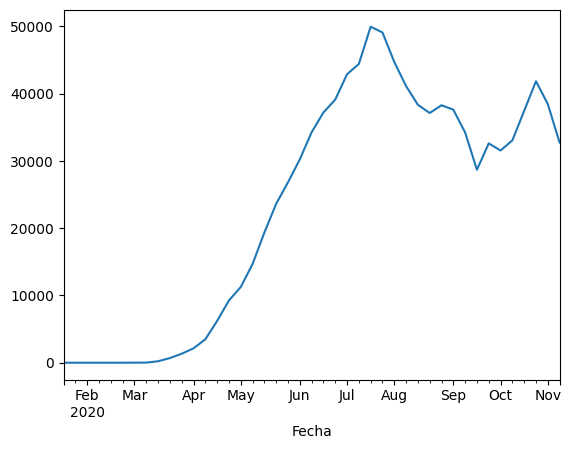

In [92]:
week_cases = df.resample('W').sum()
week_cases.loc['2020-01-15':'2020-11-14']['Nacional'].plot()

<div class="alert alert-success">
    
b). Graficar el total de pacientes confirmados cada 2 días en Yucatan (en todos los datos)
    
</div> 

<Axes: xlabel='Fecha'>

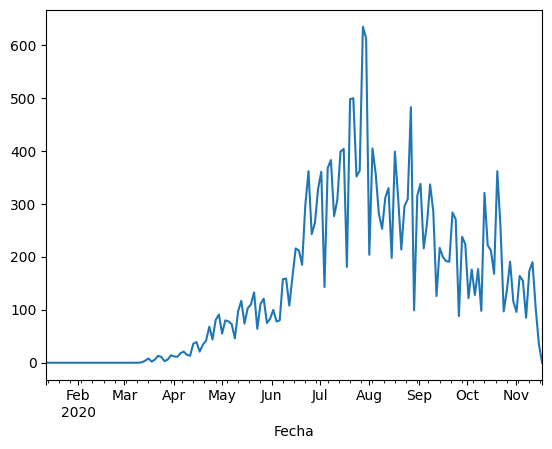

In [96]:
df['YUCATAN'].resample('2D').sum().plot()

<div class="alert alert-success">
    
c). Encontrar la semana con más pacientes confirmados en Yucatán
    
</div> 

<div class="alert alert-success">
    
d). Encontrar la semana con más pacientes confirmados a nivel Nacional
    
</div>